<a href="https://colab.research.google.com/github/chirag3096/ExcelR-Assignment/blob/main/Clustering_Airlines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters

Hierarchical

In [68]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

In [69]:
data=pd.read_csv('/content/EastWestAirlines (1).csv')

In [70]:
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [71]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [72]:
data1 = norm_func(data.iloc[:,1:])

In [73]:
data1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


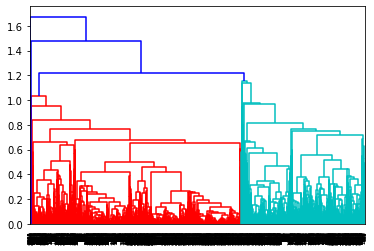

In [74]:
dendrogram = sch.dendrogram(sch.linkage(data1, method='average'))

In [75]:
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'average')

In [76]:
y_hc = hc.fit_predict(data1)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [77]:
data1['h_clusterid'] = Clusters

In [78]:
data1.sort_values("h_clusterid")

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
1999,0.191881,0.130248,1.00,0.0,0.00,0.371644,0.290698,0.011357,0.056604,0.535086,1.0,0
1505,0.229478,0.000000,0.50,0.0,0.00,0.104181,0.232558,0.051919,0.132075,0.591150,1.0,0
1503,0.297607,0.000000,0.75,0.0,0.00,0.196314,0.209302,0.014602,0.018868,0.574873,1.0,0
3165,0.114272,0.000000,0.00,0.0,0.00,0.078965,0.290698,0.215693,0.226415,0.292018,1.0,0
1501,0.031743,0.165590,0.50,0.0,0.00,0.132723,0.162791,0.000000,0.000000,0.584278,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.056678,0.106028,0.00,0.0,0.50,0.186052,0.302326,0.074634,0.169811,0.812153,1.0,4
1946,0.074419,0.000000,0.75,0.0,1.00,0.362546,0.372093,0.016225,0.018868,0.467567,1.0,4
2364,0.063397,0.000000,1.00,0.0,1.00,0.822974,0.279070,0.000000,0.000000,0.429829,1.0,4
1878,0.075258,0.000000,1.00,0.0,0.75,0.501595,0.372093,0.012980,0.037736,0.494454,1.0,4


K_means Clustering

In [79]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [80]:
X=pd.read_csv('/content/EastWestAirlines (1).csv')

In [81]:
scaler = StandardScaler()
scaled_X_df = scaler.fit_transform(X.iloc[:,1:])

In [82]:
scaled_X_df

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

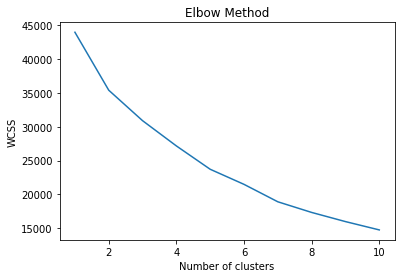

In [83]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_X_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [84]:
clusters_new = KMeans(4, random_state=42)
clusters_new.fit(scaled_X_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [85]:
clusters_new.labels_

array([0, 0, 0, ..., 2, 0, 0], dtype=int32)

In [86]:
X['clusterid_new'] = clusters_new.labels_

In [87]:
X

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_new
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [88]:
X.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2238.647612,44136.930697,97.017228,1.225920,1.019186,1.000392,4744.174628,6.943618,198.999608,0.620204,3701.218872,0.202428
1,1,1732.309091,194350.181818,778.460606,2.145455,1.036364,1.000000,31215.236364,26.890909,5404.654545,15.763636,4703.181818,0.806061
2,2,1603.915415,116574.930435,157.236364,3.714625,1.002372,1.001581,39435.720158,18.817391,341.620553,1.015020,4879.030040,0.650593
3,3,1664.866667,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333


In [89]:
X[X['clusterid_new']==3]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_new
106,109,96627,1182,1,1,3,49059,26,2300,9,6738,1,3
384,389,28193,0,5,1,4,103456,32,0,0,6980,1,3
850,861,25629,0,4,1,5,107308,36,600,2,5966,1,3
904,915,15835,0,2,1,5,112171,16,0,0,5825,1,3
1036,1047,154664,0,4,1,3,73881,33,0,0,5769,0,3
1244,1257,166465,0,4,1,4,98717,30,0,0,5531,0,3
1300,1313,737514,0,3,1,4,43993,40,2150,7,5030,0,3
1878,1895,128302,0,5,1,4,132263,32,400,2,4103,1,3
1917,1934,82981,0,5,1,3,105325,44,1000,2,3964,1,3
1946,1963,126873,0,4,1,5,95598,32,500,1,3880,1,3


In [90]:
X[X['clusterid_new']==2]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_new
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2
6,7,84914,0,3,1,1,27482,25,0,0,6994,0,2
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1,2
11,12,96522,0,5,1,1,61105,19,0,0,6924,1,2
15,16,28495,0,4,1,1,49442,15,0,0,6912,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3979,4002,57793,0,3,1,1,20959,15,1198,3,1424,1,2
3980,4003,28867,0,3,1,1,19169,28,0,0,1425,0,2
3985,4008,59017,0,4,1,1,34746,25,0,0,1418,0,2
3991,4014,39142,0,3,1,1,14981,28,0,0,1408,0,2


In [91]:
X[X['clusterid_new']==0]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_new
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
5,6,16420,0,1,1,1,0,0,0,0,6942,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,4016,3974,0,1,1,1,365,3,0,0,1397,0,0
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


DBSCAN


In [92]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [93]:
Y=pd.read_csv('/content/EastWestAirlines (1).csv')

In [94]:
Y.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [95]:
Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [96]:
Y.drop(['ID#'],axis=1,inplace=True)

In [97]:
Y.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [98]:
array=Y.values

In [99]:
array

array([[28143,     0,     1, ...,     0,  7000,     0],
       [19244,     0,     1, ...,     0,  6968,     0],
       [41354,     0,     1, ...,     0,  7034,     0],
       ...,
       [73597,     0,     3, ...,     0,  1402,     1],
       [54899,     0,     1, ...,     1,  1401,     0],
       [ 3016,     0,     1, ...,     0,  1398,     0]])

In [100]:
stscaler = StandardScaler().fit(array)
W= stscaler.transform(array)

In [101]:
W

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [102]:
dbscan = DBSCAN(eps=3, min_samples=7)
dbscan.fit(W)

DBSCAN(algorithm='auto', eps=3, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=7, n_jobs=None, p=None)

In [103]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [104]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [105]:
cl

,cluster
0,0
1,0
2,0
3,0
4,0
...,...
3994,0
3995,0
3996,0
3997,0


In [106]:
clustered = pd.concat([Y,cl],axis=1)

In [107]:
clustered[clustered['cluster']==-1]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
8,443003,0,3,2,1,1753,43,3850,12,6948,1,-1
65,53914,0,3,1,1,33767,45,5550,29,6826,1,-1
106,96627,1182,1,1,3,49059,26,2300,9,6738,1,-1
126,602064,0,5,1,1,194753,26,2250,10,7652,1,-1
151,930410,0,5,1,1,211284,18,2250,6,7640,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
3583,160114,500,1,1,1,71954,86,30817,53,1373,1,-1
3594,27619,0,4,1,1,83726,68,14050,46,1325,1,-1
3788,374613,0,1,2,1,23592,31,5000,14,3463,1,-1
3846,97510,1678,5,1,1,71609,51,7650,26,1665,1,-1


In [108]:
clustered

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,0
